In [1]:
from tensorflow.keras.models import load_model
from tensorflow import keras
import tensorflow as tf
import os
import numpy
import pandas as pd
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import tensorflow as tf
import sys


In [2]:
model = load_model("imdb_age_recog_weights_acc_74_NAS_Mobile.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
def Get_Croped_image(img,bb_data):
    img_shape = img.shape
    x = bb_data[0]
    y = bb_data[1]
    w = bb_data[2]
    h = bb_data[3]
    crop_img = img[y:y+h, x:x+w]
    return crop_img

def predict_age(path):
    
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
    img = path #cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 3)
    if len(faces) > 0 :
        bb_data = faces.tolist()[0]
        img = Get_Croped_image(img, bb_data)
        img = cv2.resize(img, (224,224))
        img = np.array(img / (np.max(img)+ 0.001))
        img = img[np.newaxis, ...]
        pred_values = model.predict(img)
        return int(np.argmax(pred_values,axis=1)[0]), bb_data
    else:
        return None
    
def predict_age_w_path(path):
    
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) > 0 :
        bb_data = faces.tolist()[0]
        img = Get_Croped_image(img, bb_data)
        img = cv2.resize(img, (224,224))
        img = np.array(img / (np.max(img)+ 0.001))
        img = img[np.newaxis, ...]
        pred_values = model.predict(img)
        return int(np.argmax(pred_values,axis=1)[0]), bb_data
    else:
        return None, None

In [4]:
def get_ages_names(folder_path):
    
    img_names = os.listdir(folder_path)
    img_ages_range = []
    for name in img_names:
        img_ages_range.append(name.split("_")[1:])
    

#img_ages = img_names.split("_")[1:2]

    for index, age_start in enumerate(img_ages_range):
        if (age_start[0] == "checkpoints"):
            continue
        img_ages_range[index][0] = int(age_start[0].split("-")[0])
        img_ages_range[index][1] = int(age_start[1].split(".")[0])
        
    img_ages = []
    
    for age_range in img_ages_range :
        img_ages.append( int(age_range[1] - age_range[0]))
        
    return img_ages, img_names

In [6]:
folder_path = "./Dataset-copy/test_data/wiki_crop/00/"

In [7]:
img_ages, img_names = get_ages_names(folder_path)

In [8]:
success = 0
fail = 0
for index, pred_age in enumerate(pseudo_age):
    if pred_age <= (actual_age[index]+5) and (pred_age >= (actual_age[index]-5)):
        success += 1
    else:
        fail+=1

NameError: name 'pseudo_age' is not defined

In [ ]:
success

In [ ]:
fail

In [28]:
(predict_age_w_path(path))

(15, [252, 387, 67, 67])

In [ ]:
capture = cv2.VideoCapture(0)

In [ ]:
img = cv2.imread(capture)

In [23]:
path = "./Dataset-copy/test_data/image_test_data/WhatsApp Image 2020-04-04 at 10.03.15 PM.jpeg"

In [24]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [25]:
faces.tolist()[0]

[252, 387, 67, 67]

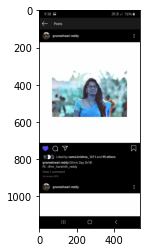

In [26]:
plt.imshow(img)

In [ ]:
faces_data

In [11]:
tf.test.is_gpu_available()

False

In [11]:
cap = cv2.VideoCapture(0)
state = True
while state:
    ret, frame = cap.read()
    while ret:
        try:
            age, bb_data = predict_age(frame)
        except:
            #print("entered exception")
            cv2.imshow("vid", frame)
            choice = cv2.waitKey(5)
            if choice == ord("q"):
                state = False
                break
            break
#         if age == None or bb_data == None:
#             break
        img = cv2.rectangle(frame, (bb_data[0], bb_data[1]), ((bb_data[0]+bb_data[2]), (bb_data[1]+bb_data[3])), (0,0,255), 2)
        if age > 20  and age <40:
            age -= 10
        if age > 40 and age <45:
            age -= 10
        img = cv2.putText(img, str(age), (bb_data[0], bb_data[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        cv2.imshow("vid", img)
        choice = cv2.waitKey(1)
        if choice == ord("q"):
            state = False
            break
        else:
            ret, frame = cap.read()
cap.release()
cv2.destroyAllWindows()

In [8]:
cap.release()
cv2.destroyAllWindows()

In [21]:
cap = cv2.VideoCapture(0)
frame = "./Dataset-copy/test_data/image_test_data/WhatsApp Image 2020-04-04 at 10.03.15 PM.jpeg"
age, bb_data = predict_age_w_path(frame)
img = cv2.rectangle(frame, (bb_data[0], bb_data[1]), ((bb_data[0]+bb_data[2]), (bb_data[1]+bb_data[3])), (0,0,255), 2)
if age > 20  and age <30:
    age -= 5
if age > 30 and age <50:
    age -= 10
img = cv2.putText(img, str(age), (bb_data[0], bb_data[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
cv2.imshow("vid", img)
choice = cv2.waitKey(0)
cap.release()
cv2.destroyAllWindows()

TypeError: an integer is required (got type tuple)

In [22]:
bb_data

[252, 387, 67, 67]